# Lab: Classification with Decision Trees

## PART 1: Basic steps

In [15]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

from sklearn.model_selection import train_test_split

In [16]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [18]:
foo = clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])
print (foo)

[1 1 0]


## PART 2 : Visualization

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



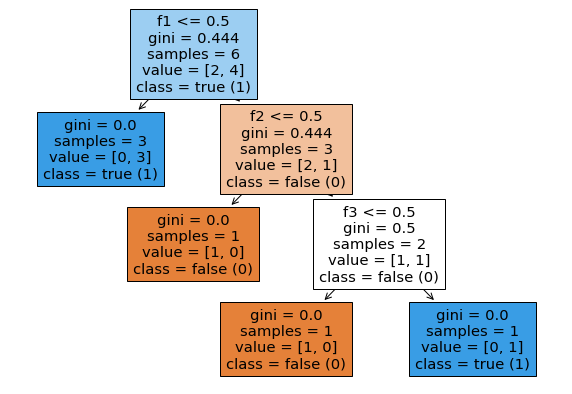

In [20]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)
plt.show()

In [21]:
#new binary dataset 
Z = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0],[1,1,1,1],[0,0,0,0],[0,1,1,0] ]

#3 more arrays added
Z_match = [1, 1, 0, 0, 1, 1,1,0,1]

In [22]:

clf = tree.DecisionTreeClassifier()

clf = clf.fit(Z, Z_match)

print(clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ]))

[1 0 1]


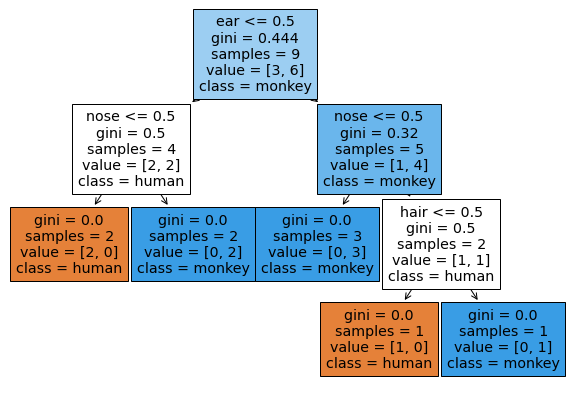

In [23]:
fig2 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("eye","hair" , "ear", "nose"),
                   class_names= ("human", "monkey"), 
                   filled=True)
plt.show()

## PART 3

### **TO DO !** 
### About the dataset :

* What are the features?
* How many examples in the dataset?
* What are your expectations regarding the most important features?
* Propose (informally) a way to reduce the dataset
* There many ways to binarize the dataset. How do you propose to do so?


In [24]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv") 
print('The dataset contains ' + str(len(train_examples[0])) +' features')
print('The dataset contains ' + str(len(train_examples)) +' examples')


The dataset contains 165 features
The dataset contains 5273 examples


In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

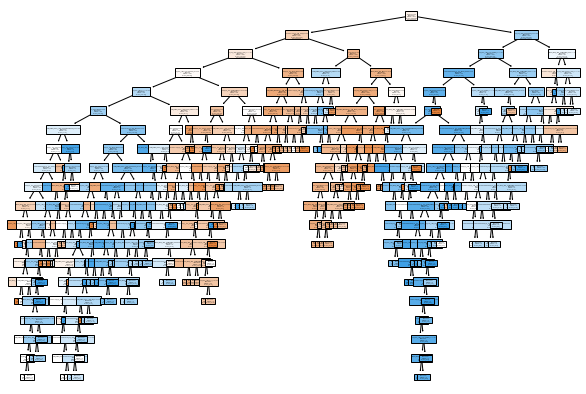

In [26]:
fig4 = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= (features),
                   class_names= ("recidiviste", "non recidiviste"), 
                   filled=True)
plt.show()

We are fiting the data using different parameters of the **`DecisionTreeClassifier`**

* `splitter` defines the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* `max_depth` defines the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* `min_samples_leaf` defines the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

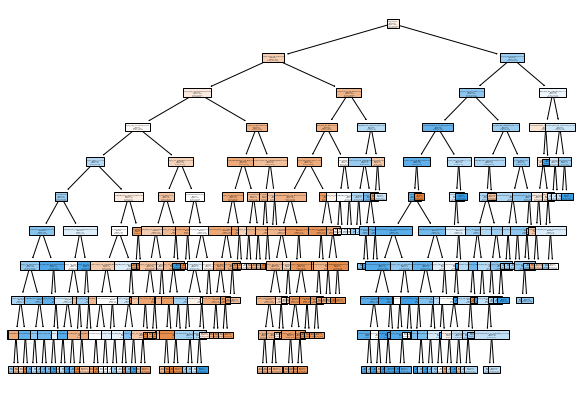

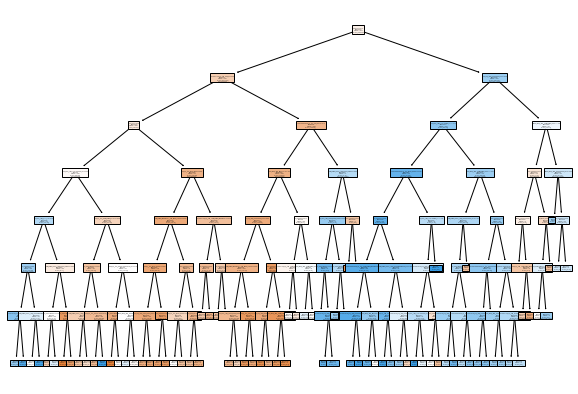

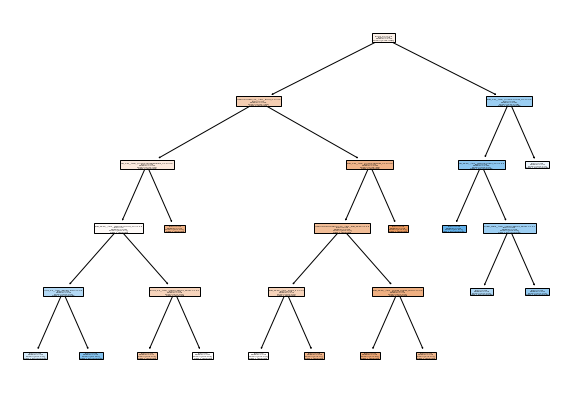

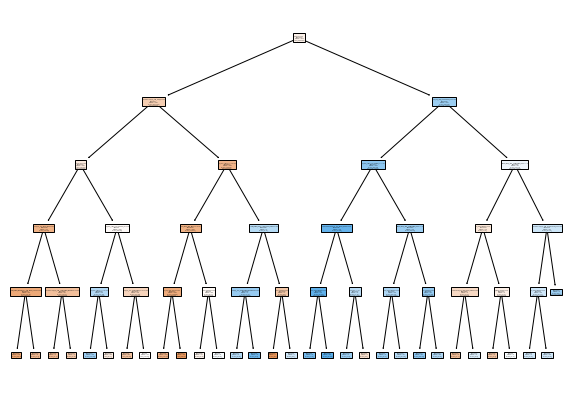

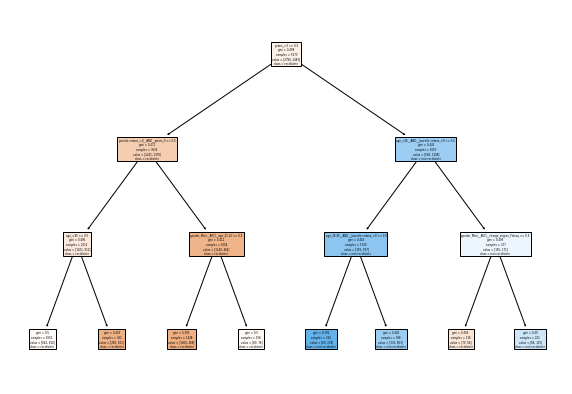

In [27]:
treesParmeters = [
    {
        'splitter':'best',
        'max_depth': 10,
        'min_samples_leaf':  1
    },
    {
        'splitter':'random',
        'max_depth': 7,
        'min_samples_leaf':  2
    },
    {
        'splitter':'best',
        'max_depth': 5,
        'min_samples_leaf':  200
    },
    {
        'splitter':'best',
        'max_depth': 5,
        'min_samples_leaf':  5
    },
    {
        'splitter':'best',
        'max_depth': 3,
        'min_samples_leaf':  100
    },
]
nbTree = len(treesParmeters)

for i in range (nbTree) :
    parameters= treesParmeters[i]
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    clf = clf.fit(train_examples, train_labels)
    
    plt.figure(figsize=(10,7))
    tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()

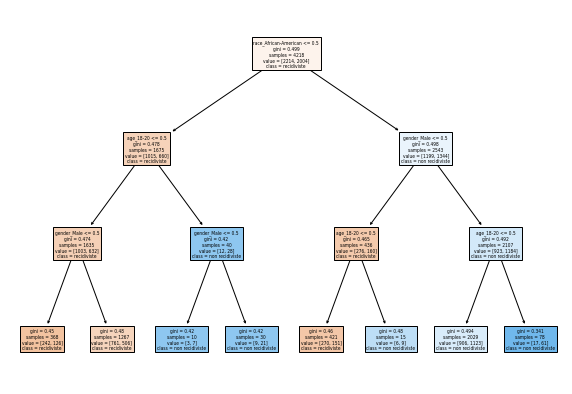

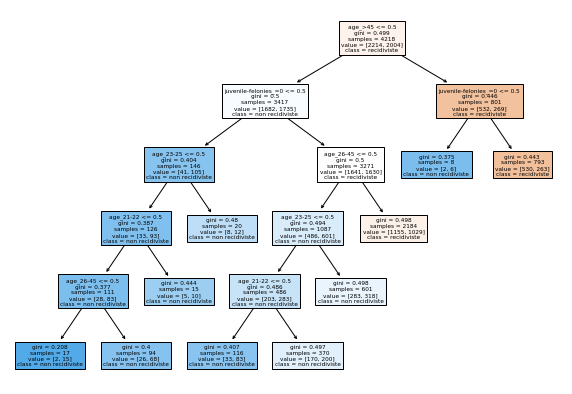

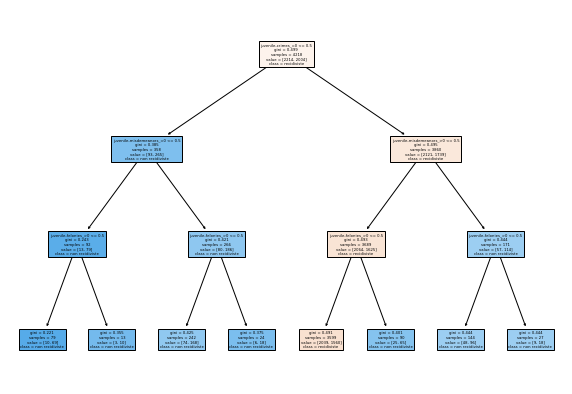

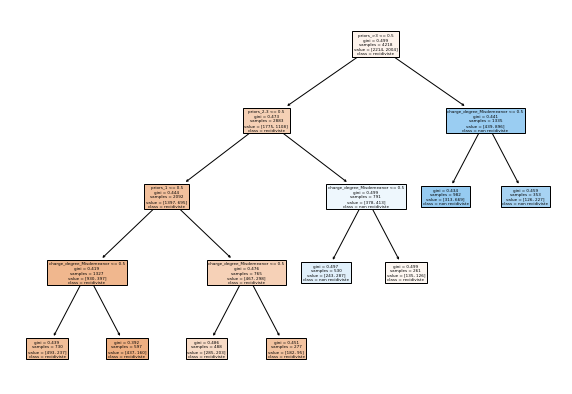

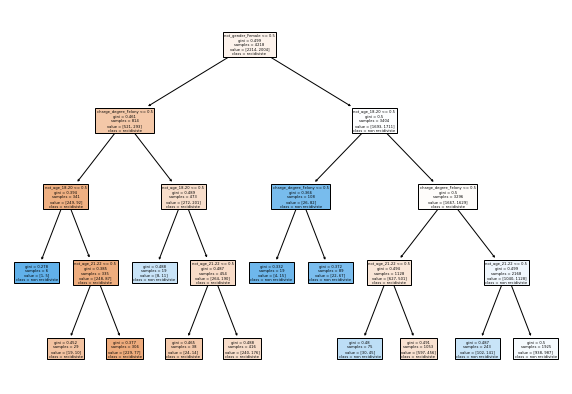

In [28]:
for i in range (5) :
    reduceTrainExemple =[]
    reduceFeatures =[]
    for line in train_examples :
        reduceTrainExemple.append(line[i*5:(i+1)*5])
    reduceFeatures=features[i*5:(i+1)*5]
    
    X_train, X_test, y_train, y_test = train_test_split(reduceTrainExemple, train_labels, test_size=0.2, random_state=42)
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    
    fig4 = plt.figure(figsize=(10,7))
    _ = tree.plot_tree(clf, 
                       feature_names= (reduceFeatures),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()